In [1]:
import torch
from torch.nn import functional as f
import torch.nn as nn 
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
sample=1000
x,y=make_circles(sample,
                 noise=0.01,
                 random_state=42
                )

In [3]:
circles=pd.DataFrame({"x1":x[:,0],
                 "x2":x[:,1],
                 "label":y})

In [4]:
circles.head()

,x1,x2,label
0,0.766286,0.216276,1
1,-0.778285,0.137826,1
2,-0.800925,0.124605,1
3,-0.358326,0.713535,1
4,0.438813,-0.898511,0


In [5]:
#lets explore the data first
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

# lets visualize the dataset

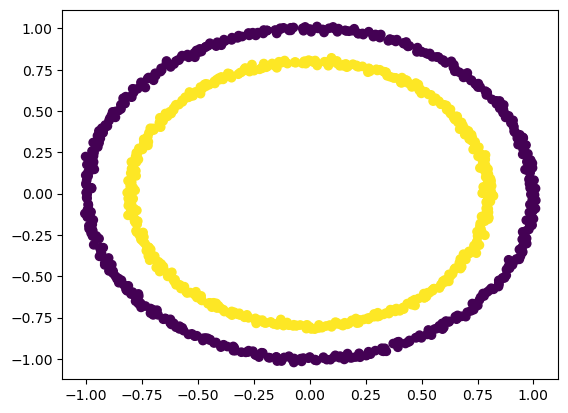

In [6]:
plt.scatter(x=x[:,0],
           y=x[:,1],
           c=y,
           cmap="viridis")

In [7]:
x.shape,y.shape

((1000, 2), (1000,))

In [8]:
print(f"value and shape: {x[0]} {y[0]} ")
print(x[0].shape,y[0].shape)

value and shape: [0.76628562 0.21627572] 1 
(2,) ()


In [9]:
torch.__version__

'2.1.2'

In [10]:
type(x),x.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
#turn ndarray  into tensor
x=torch.from_numpy(x).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

In [12]:
x[:10],y[:10]

(tensor([[ 0.7663,  0.2163],
         [-0.7783,  0.1378],
         [-0.8009,  0.1246],
         [-0.3583,  0.7135],
         [ 0.4388, -0.8985],
         [-0.4894,  0.6448],
         [-0.0113,  0.8011],
         [ 0.7834,  0.1360],
         [-0.1630, -0.7871],
         [-0.1324,  1.0008]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [13]:
x.dtype,y.dtype

(torch.float32, torch.float32)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42
                                            )

In [15]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [16]:
# device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


# lets make the model

In [17]:
class CircleClassifier(nn.Module):
    '''is used for classification of the toy dataset into one of 2 classes'''
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=8)
        self.layer_2=nn.Linear(in_features=8,out_features=1)
        
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.layer_2(self.layer_1(x))

In [18]:
#initiate the model class
model=CircleClassifier()
model.to(device)
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('layer_1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('layer_2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]])),
             ('layer_2.bias', tensor([0.2730]))])

In [19]:
#lets  maeke a model using sequenctial
model_1=torch.nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976]])),
             ('0.bias', tensor([ 0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('1.weight',
              tensor([[ 0.2271, -0.2726, -0.4427, -0.1728, -0.3430]])),
             ('1.bias', tensor([0.3670]))])

In [20]:
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.1177, -0.2296],
         [ 0.4370,  0.1102],
         [ 0.5713,  0.0773],
         [-0.2230,  0.1900],
         [-0.1918,  0.2976]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6313,  0.4087, -0.3091,  0.4082,  0.1265], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2271, -0.2726, -0.4427, -0.1728, -0.3430]], requires_grad=True),
 Parameter containing:
 tensor([0.3670], requires_grad=True)]

In [21]:
x_test.shape,y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

# lets train the model

In [22]:
# lets make predictions
with torch.inference_mode():
    y_preds=model(x_test)[:5]

print(f"predicted and actual shapes respectively,{y_preds.shape} and {y_test.shape} ")
print(f" predicred value :{y_preds[:10]}")
print(f" actual value {y_test[:10]} ")

predicted and actual shapes respectively,torch.Size([5, 1]) and torch.Size([200]) 
 predicred value :tensor([[-0.3117],
        [-0.4812],
        [ 0.1247],
        [-0.4206],
        [ 0.0767]])
 actual value tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]) 


### notice
* we can clearly see that the difference between the predicted and actual value..so we need to put some form of function 
to transform them into probability distribution



In [23]:
y_pred_prob=torch.sigmoid(y_preds)
y_pred_prob

tensor([[0.4227],
        [0.3820],
        [0.5311],
        [0.3964],
        [0.5192]])

In [24]:
# know lets adjust the value a bit
torch.round(y_pred_prob)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [25]:
y_pred=torch.round(y_pred_prob)  #notice that its y_pred and not y_preds
y_pred

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [26]:
#lets check for the difference between all in one approcach and just different
y_pred_label=torch.round(torch.sigmoid(y_preds.to(device)))

#lets check for the difference between
checker=torch.eq(y_pred_label.squeeze(),y_pred.squeeze())
print(checker)


tensor([True, True, True, True, True])


# train using training loop

In [27]:
# lets find out the number of parameters
tot_param=0
for param in model.parameters():
    tot_param+=param.numel()
print(f"the total number in my model is: {tot_param} ")

the total number in my model is: 33 


In [28]:
# setting upthe loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()  #its inputs are logits
optimizer=torch.optim.SGD(params=model.parameters(),
                     lr=0.01)

In [29]:
def accuracy(y_pred,y_true):
    correct=torch.eq(y_pred,y_true).sum().item()
    acc=correct/len(y_pred)*100
    return acc

In [30]:
#before training the model 
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

In [31]:
torch.manual_seed(42)

epochs=200

for epoch in range(epochs):
    
    model.train()
    #this is the feed forward network 
    y_logits=model(x_train).squeeze()
    
    y_pred=torch.round(torch.sigmoid(y_logits)) #turns logits -> pred probs -> pred labels

    #calculates the loss
    train_loss=loss_fn(y_logits,y_train)

    train_acc=accuracy(y_pred,y_train)
    
    optimizer.zero_grad()  #we dont want to save any gradients from past epochs

    #this is the backpropagation
    train_loss.backward()  #this is for using backproopagation
    
    optimizer.step()  #update the parameter

    #we dont want the model to save any parameter
    model.eval()
    with torch.inference_mode():
        y_test_logits=model(x_test).squeeze()  
        y_test_pred=torch.round(torch.sigmoid(y_test_logits))
        test_loss=loss_fn(y_test_logits,y_test)
        test_acc=accuracy(y_pred=y_test_pred,y_true=y_test)
    
    if epoch%10==0:
        print(f"epoch is {epoch} | train loss is {train_loss:.3f} | train accuracy is {train_acc:.3f} and test loss is {test_loss:.3f} and test accursy is {test_acc:.3f}")

epoch is 0 | train loss is 0.705 | train accuracy is 48.000 and test loss is 0.695 and test accursy is 53.000
epoch is 10 | train loss is 0.705 | train accuracy is 48.250 and test loss is 0.694 and test accursy is 52.500
epoch is 20 | train loss is 0.704 | train accuracy is 48.250 and test loss is 0.694 and test accursy is 53.000
epoch is 30 | train loss is 0.704 | train accuracy is 48.000 and test loss is 0.694 and test accursy is 53.500
epoch is 40 | train loss is 0.703 | train accuracy is 48.125 and test loss is 0.693 and test accursy is 53.000
epoch is 50 | train loss is 0.703 | train accuracy is 48.250 and test loss is 0.693 and test accursy is 52.500
epoch is 60 | train loss is 0.702 | train accuracy is 48.375 and test loss is 0.693 and test accursy is 52.000
epoch is 70 | train loss is 0.702 | train accuracy is 48.500 and test loss is 0.693 and test accursy is 52.000
epoch is 80 | train loss is 0.702 | train accuracy is 48.625 and test loss is 0.692 and test accursy is 52.000
ep

In [32]:
#i want to check size for some reason
y_logits.shape,y_train.shape

(torch.Size([800]), torch.Size([800]))


**since our model is not good at predicting its almost as if its guessing so we need more data analysis**


In [33]:
x_min = np.linspace(-4, 4, 9)
print(x_min)
print(x_min.ravel())

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
[-4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [34]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("file already exists so quiting installing")
else:
    print("dawnloading helper_function.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

file already exists so quiting installing


In [35]:
from helper_function import plot_predictions,plot_decision_boundary

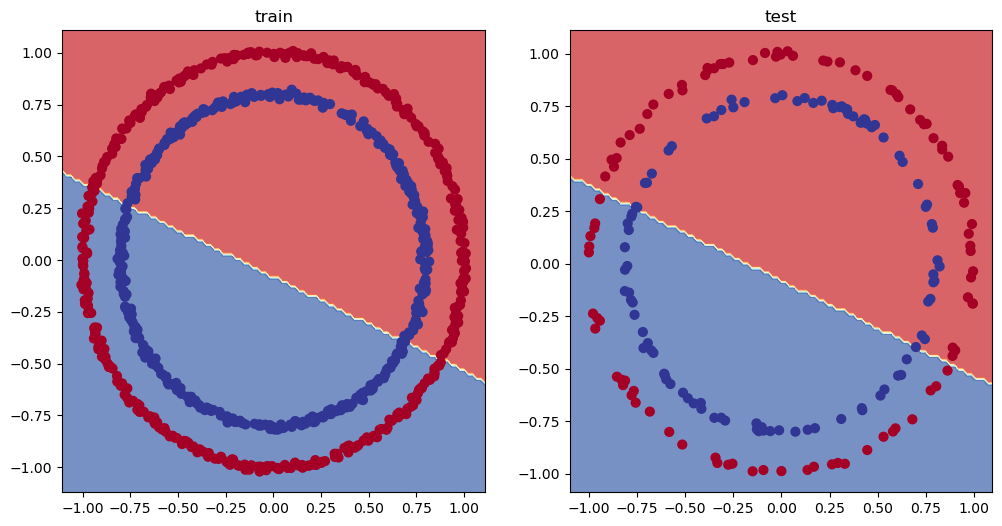

In [36]:
#plot the decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model,x_test,y_test)

* judging by what we see here no wonder our model prediction seemed like guess becuause for the most part they are, 
the data which we are tying our model to fit into seems to be circular but our model is drawing a simple line because we 
are using a linear regression model and that won't fit into the model

# improving the model


* am gonna add more neurons per layer
* am gonna add more layers
* and add activation functions to detect non linear relations

In [37]:
class model_v2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=10)
        self.layer2=nn.Linear(in_features=10,out_features=10)
        self.layer3=nn.Linear(in_features=10,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
        # z=self.layer1(x)
        # z=self.layer2(z)
        # z=self.layer3(z)
        #writing like the commented code might be abit slow 
        return self.layer3(self.layer2(self.layer1(x)))

In [38]:
model_2=model_v2()
model_2.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [39]:
# lets find out the number of parameters
tot_param=0
for param in model_2.parameters():
    tot_param+=param.numel()
print(f"the total number in my model is: {tot_param} ")

the total number in my model is: 151 


In [40]:
model_2.to(device)

model_v2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# lets move the data onto cuda is available
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

#lets train our updated model
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)
loss_fn=nn.BCEWithLogitsLoss()  #the input to this loss is logits


In [42]:
#les train our model
epochs=100
for epoch in range(epochs):
    
    model_2.train()  #setting the model to train mode
    
    y_pred_train_logits=model_2(x_train).squeeze()
    y_pred=torch.round(torch.sigmoid(x_train)).squeeze()  #logits->probs_dist->pred labels

    loss=loss_fn(y_pred_train_logits,y_train)

    #back propagation
    loss.backward()

    #lets zero grad 
    optimizer.zero_grad()

    #lets update the parameters
    optimizer.step()
    #lets evalute the model
    model_2.eval()
    with torch.inference_mode():
        y_val_pred=model_2(x_test).squeeze()
        y_val=torch.round(torch.sigmoid(y_val_pred))
        val_loss=loss_fn(y_val_pred,y_test)
        accuracy_val=accuracy(y_val,y_test)
    if epoch%10==0:
        print(f"epoch is {epoch}| loss is | {val_loss:.3f}| accuracy is {accuracy_val:}")

epoch is 0| loss is | 0.693| accuracy is 51.0
epoch is 10| loss is | 0.693| accuracy is 51.0
epoch is 20| loss is | 0.693| accuracy is 51.0
epoch is 30| loss is | 0.693| accuracy is 51.0
epoch is 40| loss is | 0.693| accuracy is 51.0
epoch is 50| loss is | 0.693| accuracy is 51.0
epoch is 60| loss is | 0.693| accuracy is 51.0
epoch is 70| loss is | 0.693| accuracy is 51.0
epoch is 80| loss is | 0.693| accuracy is 51.0
epoch is 90| loss is | 0.693| accuracy is 51.0


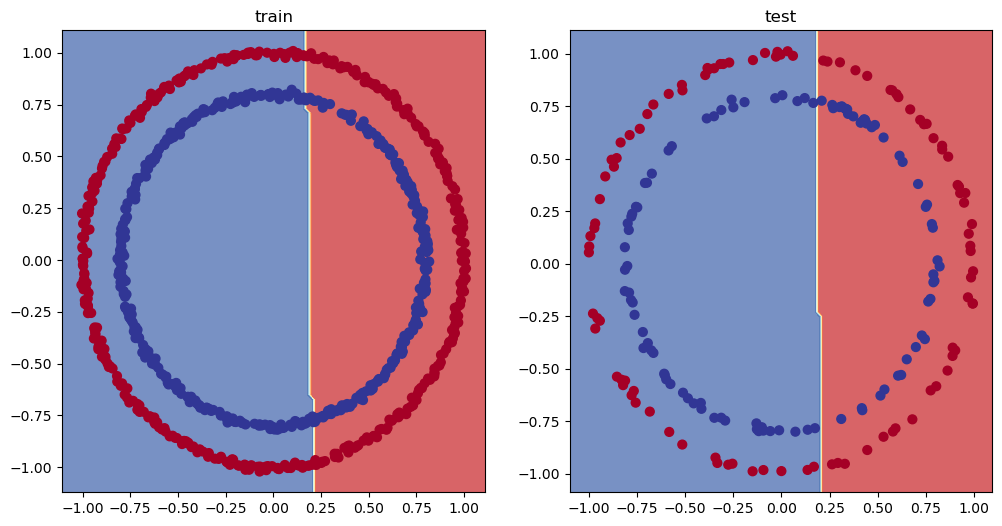

In [43]:
# lets plot the decision boundary
#plot the decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_2,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_2,x_test,y_test)

# check for linear and non liner evaluation of our model

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

weight=0.7
bias=0.2

x_regression=torch.arange(0,1,0.01).unsqueeze(dim=1)
y_regression=x_regression*weight+bias

print(x_regression.shape)
print(x_regression[:10])

torch.Size([100, 1])
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])


In [45]:
print(y_regression.shape)

torch.Size([100, 1])


In [46]:
train_split=int(0.8*len(x_regression))

x_train_reg,y_train_reg=x_regression[:train_split],y_regression[:train_split]

x_test_reg,y_test_reg=x_regression[train_split:],y_regression[train_split:]

print(f"x_train {x_train_reg.shape} and x_test: {x_test_reg.shape} ")
print(f"y_train {y_train_reg.shape}  and y_test: {y_test_reg.shape} ")

x_train torch.Size([80, 1]) and x_test: torch.Size([20, 1]) 
y_train torch.Size([80, 1])  and y_test: torch.Size([20, 1]) 


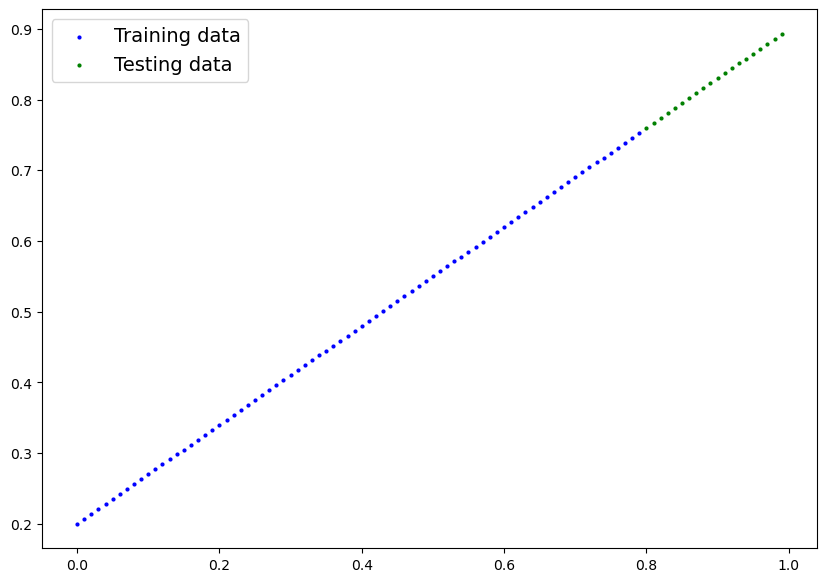

In [47]:
plot_predictions(x_train_reg,y_train_reg,
                x_test_reg,y_test_reg)

## lets build a model that fits into this straight line

In [48]:
#lets build the exact model as the last one but with sequential
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=20),
    nn.Linear(in_features=20,out_features=20),
    nn.Linear(in_features=20,out_features=1)
).to(device)

In [49]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Linear(in_features=20, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=1, bias=True)
)

In [50]:
#lets chack for the number of parameters of the model
tot_param=0
for param in model_2.parameters():
    tot_param+=param.numel()
print(tot_param)

481


In [51]:
#loss 
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.01)

In [58]:
#lets move our data into CPU OR GPU/CUDA if available
x_train_reg,y_train_reg=x_train_reg.to(device),y_train_reg.to(device)

x_test_reg,y_test_reg=x_test_reg.to(device),y_test_reg.to(device)

#lets train our model
epochs=1000

for epoch in range(epochs):
    
    model_2.train()
   
    y_train_logits=model_2(x_train_reg)
   # y_train_dist=torch.round(torch.sigmoid(y_train_logits))

    #lets check for loss
    train_loss=loss_fn(y_train_logits,y_train_reg)

    #optimize the parameters
    optimizer.zero_grad()
    
    #back propagation
    train_loss.backward()

    #update the parameters
    optimizer.step()
    #check in validation mode
    model_2.eval()
    
    with torch.inference_mode():
        
        y_val_logits=model_2(x_test_reg)
        
        #y_val_dist=torch.round(torch.sigmoid(y_val_logits))
       # val_accuracy=accuracy(y_test_reg,y_val_dist)
        
        test_loss=loss_fn(y_val_logits,y_test_reg)
     # Print out what's happenin'
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f} | Test loss: {test_loss:.5f}")
        #print(f"Epoch: {epoch} | Loss: {train_loss:.5f} ")

Epoch: 0 | Loss: 0.02034 | Test loss: 0.00442
Epoch: 100 | Loss: 0.01785 | Test loss: 0.00298
Epoch: 200 | Loss: 0.01752 | Test loss: 0.00291
Epoch: 300 | Loss: 0.01958 | Test loss: 0.00409
Epoch: 400 | Loss: 0.01930 | Test loss: 0.00422
Epoch: 500 | Loss: 0.01887 | Test loss: 0.00392
Epoch: 600 | Loss: 0.01828 | Test loss: 0.00323
Epoch: 700 | Loss: 0.01698 | Test loss: 0.00231
Epoch: 800 | Loss: 0.01814 | Test loss: 0.00382
Epoch: 900 | Loss: 0.01767 | Test loss: 0.00366


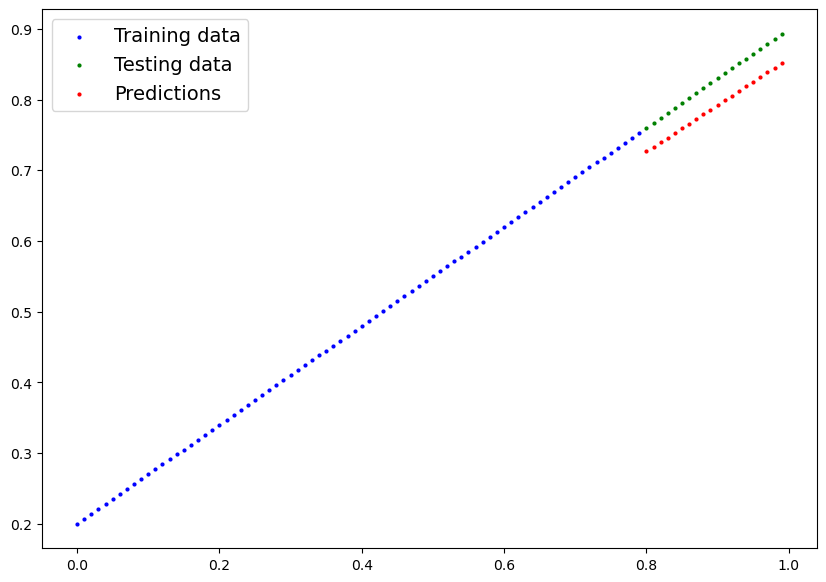

In [61]:
plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg,
                 predictions=y_val_logits);

# Conclusion:
* we can confirm that the model we have been using only works on linear problems 
* inorder to continue on our journey we need to add use non-linear graphs(layers)